## Project - LineArtTSP

### Group member: Duedahl Mathias, Antoine Neveu, Jianing Lyu


### Introduction:
Approximate images using a single closed curve generated by halftoning the image and finding a cycle by solving TSP on the generated stippling points.

The backbone of this project will consist of these major components:

Halftone an arbitrary image and convert points to graph object Find non self intersection Hamiltonian cycle on nodes by solving TSP using heuristic Plot the resulting curve

## Halftone

Introduction of Halftone: 

Takes a random selection of n points (see below) from the image. If one is using the contrast halftoning method, it will compare these points to the point x_pixel_distance and y_pixel_distance away from the chosen point
(see docstring for specific information) and accept the point if it is sufficiently different from this neighbor point, based on the application of a euclidean metric to RGB values, conditioned on an input contrast_threshold value.
One can 'smoothen' this acceptance of points (i.e. accepting points in a neighborhood of the contrast based on a probability function) by setting the smoothing_constant to a value between 0 and 1 (0 means no smoothing, 1 means most
generous probability function). 

If one is using the brightness method, it will convert the image to grayscale, and perform rejection sampling (see https://en.wikipedia.org/wiki/Rejection_sampling) on n points, based on the brightness of n randomly chosen points. 

For either method, one can set 'invert' to True in order to reverse the functions of each of these methods. This ends up meaning exactly what one would intuitively expect - for the contrast method, it will instead only choose points that are similar to nearby points, and for the brightness method, it will choose points that are lighter, rather than points that are darker.

An interesting extension about halftone: https://tabreturn.github.io/code/processing/python/2019/02/09/processing.py_in_ten_lessons-6.3-_halftones.html



## TSP

Here is an explanation about TSP: https://developers.google.com/optimization/routing/tsp





## Main
This indicates our desired output should look like after the major dealing with the image. There are three different styles, one is points, which is result of an image after halftoning, and the other two style are line and spline, which connected selected points by a closed line.  
for different imput:
### n: The number of points that the graph will use

### timelimit: the maximum amount of time that TSP will attempt to find optimal solution

### style: style of image that will be plotted

###

In [15]:
from graph import Graph
from halftoning import rejectionSampling

Choose image and number of points selected from image, then halftone the image based on imagestyle is brightness. Then, it can random select points based on grey_scale, if in an image, area A is darker than area B, then more points would be selected from area A. 

The larger value n is, the clearer image can be displayed. 

In [16]:
# Generate test data points
n=1000
# Path to image file
path = 'recurrentTheme.jpg'
# Generate points
nodes1 = rejectionSampling(n, path, imagestyle = "brightness")

set timelimit for the code 

In [17]:
# Create graph object solve TSP
G = Graph()
G.setNodes(nodes1)
G.setDistMatrix()
G.TSP(timelimit=30)

100%|██████████| 995/995 [00:01<00:00, 857.35it/s] 


TSP solver framework constructed. Setting solver parameters
Solving...


I0311 16:46:19.618110     1 search.cc:264] Start search (memory used = 233.38 MB)
I0311 16:46:19.619227     1 search.cc:264] Root node processed (time = 1 ms, constraints = 3988, memory used = 235.17 MB)
I0311 16:46:20.116157     1 search.cc:264] Solution #0 (1005960, time = 497 ms, branches = 34, failures = 1, depth = 33, memory used = 237.20 MB, limit = 1%)
I0311 16:46:21.106753     1 search.cc:264] Solution #1 (1005792, objective maximum = 1005960, time = 1488 ms, branches = 38, failures = 3, depth = 33, LinKernighan, neighbors = 1, filtered neighbors = 1, accepted neighbors = 1, memory used = 237.78 MB, limit = 1%)
I0311 16:46:21.107834     1 search.cc:264] Solution #2 (1005766, objective maximum = 1005960, time = 1489 ms, branches = 43, failures = 5, depth = 33, LinKernighan, neighbors = 2, filtered neighbors = 2, accepted neighbors = 2, memory used = 237.81 MB, limit = 1%)
I0311 16:46:21.108958     1 search.cc:264] Solution #3 (1005429, objective maximum = 1005960, time = 1490 ms

Solver finished


I0311 16:46:47.711188     1 search.cc:264] Finished search tree (time = 28093 ms, branches = 2358, failures = 963, neighbors = 10856463, filtered neighbors = 465, accepted neigbors = 465, memory used = 151.70 MB)
I0311 16:46:47.711950     1 search.cc:264] End search (time = 28093 ms, branches = 2358, failures = 963, memory used = 152.78 MB, speed = 83 branches/s)


An image after halftoning

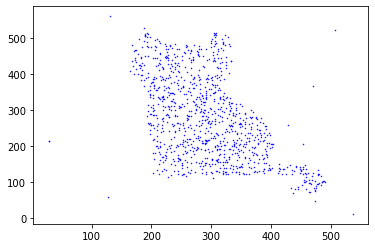

In [18]:
G.plot(style="point") 

Plot points with line

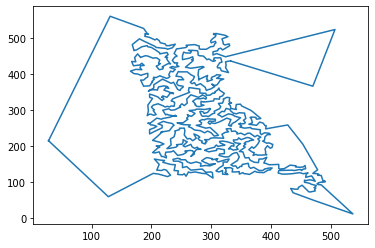

In [19]:
G.plot(style="line")

Plot points with curve

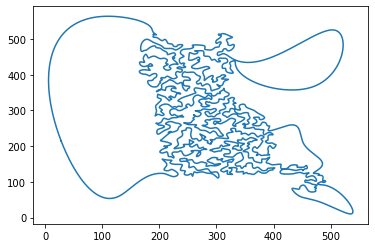

In [20]:
G.plot(style="spline")

Choose image and number of points selected from image, then haletone the image based on imagestyle is contrast. Therefore, only can get points from the edge because the difference between points at edges is obvious and easy to catch. 

This CONTRAST method is a better to analysis image with clear edge and clear color difference. 

100%|██████████| 979/979 [00:01<00:00, 871.29it/s] 


TSP solver framework constructed. Setting solver parameters
Solving...


I0311 16:46:55.725169     1 search.cc:264] Start search (memory used = 976.19 MB)
I0311 16:46:55.726235     1 search.cc:264] Root node processed (time = 1 ms, constraints = 3924, memory used = 977.56 MB)
I0311 16:46:56.198463     1 search.cc:264] Solution #0 (721346, time = 473 ms, branches = 34, failures = 1, depth = 33, memory used = 978.22 MB, limit = 1%)
I0311 16:46:57.161152     1 search.cc:264] Solution #1 (721331, objective maximum = 721346, time = 1435 ms, branches = 38, failures = 3, depth = 33, LinKernighan, neighbors = 1, filtered neighbors = 1, accepted neighbors = 1, memory used = 978.22 MB, limit = 1%)
I0311 16:46:57.162423     1 search.cc:264] Solution #2 (721283, objective maximum = 721346, time = 1437 ms, branches = 43, failures = 5, depth = 33, LinKernighan, neighbors = 2, filtered neighbors = 2, accepted neighbors = 2, memory used = 978.22 MB, limit = 1%)
I0311 16:46:57.163523     1 search.cc:264] Solution #3 (721152, objective maximum = 721346, time = 1438 ms, branc

Solver finished


I0311 16:47:33.899237     1 search.cc:264] Finished search tree (time = 38174 ms, branches = 1742, failures = 716, neighbors = 15414954, filtered neighbors = 342, accepted neigbors = 342, memory used = 159.27 MB)
I0311 16:47:33.899968     1 search.cc:264] End search (time = 38174 ms, branches = 1742, failures = 716, memory used = 160.19 MB, speed = 45 branches/s)


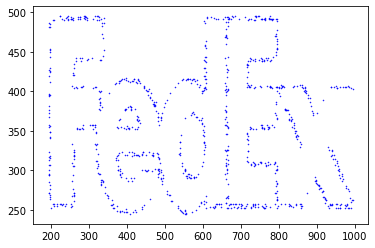

In [21]:

path2 = 'fedex.jpg'
nodes2 = rejectionSampling(n, path2, imagestyle = "contrast")
R = Graph()
R.setNodes(nodes2)
R.setDistMatrix()
R.TSP(timelimit=30)
R.plot(style="point") 

For an image like Fedex logo, if you would like to deal with BRIGHTNESS method. 

100%|██████████| 995/995 [00:01<00:00, 868.31it/s] 


TSP solver framework constructed. Setting solver parameters
Solving...


I0311 16:50:30.485159     1 search.cc:264] Start search (memory used = 341.78 MB)
I0311 16:50:30.486301     1 search.cc:264] Root node processed (time = 1 ms, constraints = 3988, memory used = 343.56 MB)
I0311 16:50:30.987194     1 search.cc:264] Solution #0 (1896969, time = 501 ms, branches = 34, failures = 1, depth = 33, memory used = 346.11 MB, limit = 1%)
I0311 16:50:31.993984     1 search.cc:264] Solution #1 (1896675, objective maximum = 1896969, time = 1508 ms, branches = 38, failures = 3, depth = 33, LinKernighan, neighbors = 1, filtered neighbors = 1, accepted neighbors = 1, memory used = 346.78 MB, limit = 1%)
I0311 16:50:31.994830     1 search.cc:264] Solution #2 (1896673, objective maximum = 1896969, time = 1509 ms, branches = 43, failures = 5, depth = 33, LinKernighan, neighbors = 2, filtered neighbors = 2, accepted neighbors = 2, memory used = 346.92 MB, limit = 1%)
I0311 16:50:31.996038     1 search.cc:264] Solution #3 (1896619, objective maximum = 1896969, time = 1510 ms

Solver finished


I0311 16:50:58.397323     1 search.cc:264] Solution #361 (1645134, objective maximum = 1896969, time = 27912 ms, branches = 1834, failures = 723, depth = 33, OrOpt<1>, neighbors = 10759466, filtered neighbors = 361, accepted neighbors = 361, memory used = 185.39 MB, limit = 99%)
I0311 16:50:58.539212     1 search.cc:264] Finished search tree (time = 28053 ms, branches = 1838, failures = 755, neighbors = 10821221, filtered neighbors = 361, accepted neigbors = 361, memory used = 185.42 MB)
I0311 16:50:58.539941     1 search.cc:264] End search (time = 28054 ms, branches = 1838, failures = 755, memory used = 185.95 MB, speed = 65 branches/s)


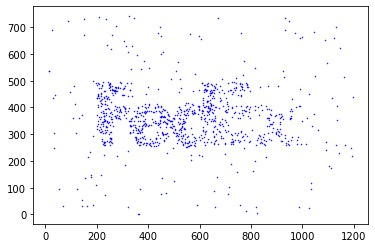

In [24]:
nodes3 = rejectionSampling(n,path2,imagestyle='brightness')
A = Graph()
A.setNodes(nodes3)
A.setDistMatrix()
A.TSP(timelimit=30)
A.plot(style="point") 

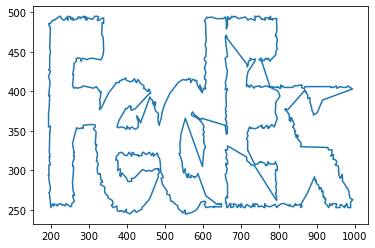

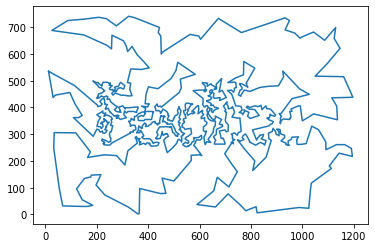

In [25]:
R.plot(style="line")
A.plot(style="line")


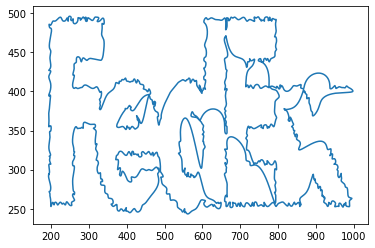

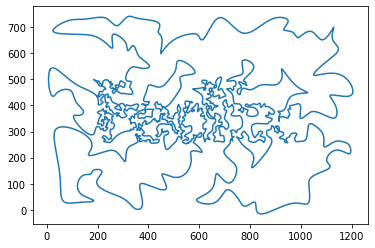

In [26]:
R.plot(style="spline")
A.plot(style="spline")